## Dolphins graph

- Download the .mtx graph file from https://networkrepository.com/soc-dolphins.php. 
- This file essentially is a matrix file depicting the edges of the graph.

In [ ]:
from scipy.io import mmread

dolphins = mmread('drive/MyDrive/EE5111/soc-dolphins.mtx')
dolphins = dolphins.toarray()

In [ ]:
dolphins.shape

(62, 62)

The graph has 62 nodes.

1 represents the presence of an edge, 0 represents the absence of an edge

## Transition matrix for simple random walk

In [ ]:
import numpy as np

In [ ]:
def gen_srw_transition(graph):

  vertices = graph.shape[0]
  trans_mtx = np.zeros((vertices, vertices))
  degrees = []

  for i in range(vertices):
    total_edges = np.sum(graph[i, :])
    degrees.append(total_edges)
    trans_mtx[i, :] = graph[i, :]/total_edges
  
  return trans_mtx, degrees

In [ ]:
srw_mtx, d = gen_srw_transition(dolphins)

In [ ]:
srw_mtx[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.16666667, 0.        , 0.        , 0.        , 0.16666667,
       0.16666667, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.16666667, 0.        , 0.16666667, 0.        , 0.        ,
       0.        , 0.        , 0.16666667, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        ])

In [ ]:
sum(d)

318.0

## Vectors

In [ ]:
# No: of datapoints
n = 62

# Dimension of paramater vector
k = 10

A = np.zeros((k, n))
a_sum = np.zeros(k)

for i in range(n):
  a = np.random.rand(k)
  A[:, i] = a
  a_sum += a
  

In [ ]:
theta_optim = (1/n)*(a_sum)

In [ ]:
theta_optim

array([0.49095743, 0.49059594, 0.43377454, 0.50391219, 0.4952963 ,
       0.46603622, 0.49413967, 0.53750927, 0.45790361, 0.43659086])

In [ ]:
def fun(x):
  x = x.reshape(k, 1)
  return n * x.T @ x - 2 * a_sum.T @ x

In [ ]:
from scipy.optimize import minimize

In [ ]:
test = minimize(fun, np.random.rand(k))

In [ ]:
test

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: -143.82122090169423
        x: [ 4.910e-01  4.906e-01  4.338e-01  5.039e-01  4.953e-01
             4.660e-01  4.941e-01  5.375e-01  4.579e-01  4.366e-01]
      nit: 3
      jac: [ 0.000e+00  1.907e-06  0.000e+00  0.000e+00 -1.907e-06
             0.000e+00  0.000e+00  3.815e-06  1.907e-06  0.000e+00]
 hess_inv: [[ 9.998e-01  8.235e-03 ...  9.164e-03 -1.913e-03]
            [ 8.235e-03  6.624e-01 ... -3.757e-01  7.844e-02]
            ...
            [ 9.164e-03 -3.757e-01 ...  5.820e-01  8.729e-02]
            [-1.913e-03  7.844e-02 ...  8.729e-02  9.818e-01]]
     nfev: 55
     njev: 5

### Performing SGD

In [ ]:
import matplotlib.pyplot as plt

In [ ]:


losses = []

num_expts = 50

for expt in range(num_expts):

  print("Running experiment:", expt+1)

  ep_loss = []

  theta = np.random.rand(k, 1)

  num_iter = int(1e5)

  current_node = np.random.choice(np.arange(0, n))

  for i in range(1, num_iter + 1):

    a_i = A[:, current_node].reshape(k, 1)

    gamma = 1/(i**(0.9))

    grad_g = (sum(d)/(n*d[current_node]))*(2*( theta - a_i ))

    theta -= gamma * grad_g

    current_node = np.random.choice(np.arange(0, n), p = srw_mtx[current_node].reshape(n))  

    ep_loss.append(np.linalg.norm(theta - theta_optim)**2)
  
  losses.append(ep_loss)




Running experiment: 1
Running experiment: 2
Running experiment: 3
Running experiment: 4
Running experiment: 5
Running experiment: 6
Running experiment: 7
Running experiment: 8
Running experiment: 9
Running experiment: 10
Running experiment: 11
Running experiment: 12
Running experiment: 13
Running experiment: 14
Running experiment: 15
Running experiment: 16
Running experiment: 17
Running experiment: 18
Running experiment: 19
Running experiment: 20
Running experiment: 21
Running experiment: 22
Running experiment: 23
Running experiment: 24
Running experiment: 25
Running experiment: 26
Running experiment: 27
Running experiment: 28
Running experiment: 29
Running experiment: 30
Running experiment: 31
Running experiment: 32
Running experiment: 33
Running experiment: 34
Running experiment: 35
Running experiment: 36
Running experiment: 37
Running experiment: 38
Running experiment: 39
Running experiment: 40
Running experiment: 41
Running experiment: 42
Running experiment: 43
Running experiment: 

In [ ]:
exp_loss_srw = np.mean(np.array(losses), axis = 0)

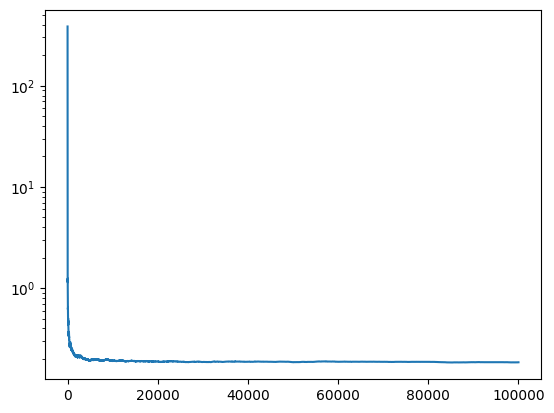

In [ ]:
plt.plot(np.arange(0, num_iter), (exp_loss_srw))
plt.yscale('log')

In [ ]:

losses_nbrw = []

num_expts = 50

for expt in range(num_expts):

  print("Running experiment:", expt+1)

  theta = np.random.rand(k, 1)

  num_iter = int(1e5)

  ep_loss = []

  current_node = np.random.choice(np.arange(0, n))

  for i in range(1, num_iter + 1):
  

    a_i = A[:, current_node].reshape(k, 1)

    gamma = 1/(i**(0.9))

    grad_g = (sum(d)/(n*d[current_node]))*(2*( theta - a_i ))

    theta -= gamma * grad_g

    if i == 1:
      previous_node = current_node
      current_node = np.random.choice(np.arange(0, n), p = srw_mtx[current_node].reshape(n))  

    else:
      probs_nbrw = dolphins[current_node].copy()
      probs_nbrw[previous_node] = 0
      if probs_nbrw.sum() == 0:
        probs_nbrw[previous_node] = 1
      else:
        probs_nbrw /= probs_nbrw.sum()
      previous_node = current_node
      current_node = np.random.choice(np.arange(0, n), p = probs_nbrw)
    
    ep_loss.append(np.linalg.norm(theta - theta_optim)**2)

  losses_nbrw.append(ep_loss)


Running experiment: 1
Running experiment: 2
Running experiment: 3
Running experiment: 4
Running experiment: 5
Running experiment: 6
Running experiment: 7
Running experiment: 8
Running experiment: 9
Running experiment: 10
Running experiment: 11
Running experiment: 12
Running experiment: 13
Running experiment: 14
Running experiment: 15
Running experiment: 16
Running experiment: 17
Running experiment: 18
Running experiment: 19
Running experiment: 20
Running experiment: 21
Running experiment: 22
Running experiment: 23
Running experiment: 24
Running experiment: 25
Running experiment: 26
Running experiment: 27
Running experiment: 28
Running experiment: 29
Running experiment: 30
Running experiment: 31
Running experiment: 32
Running experiment: 33
Running experiment: 34
Running experiment: 35
Running experiment: 36
Running experiment: 37
Running experiment: 38
Running experiment: 39
Running experiment: 40
Running experiment: 41
Running experiment: 42
Running experiment: 43
Running experiment: 

In [ ]:
exp_loss_nbrw = np.mean(np.array(losses_nbrw), axis = 0)

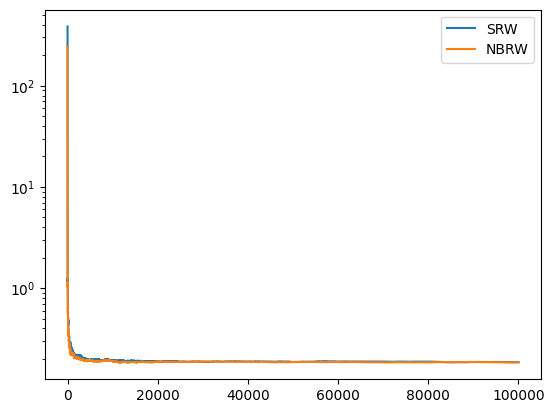

In [ ]:
plt.plot(np.arange(0, num_iter), (exp_loss_srw), label = 'SRW')
plt.plot(np.arange(0, num_iter), (exp_loss_nbrw), label = 'NBRW')
plt.yscale('log')
plt.legend()

#### Uniform sampling

In [ ]:

losses_us = []

num_expts = 50

for expt in range(num_expts):

  print("Running experiment:", expt+1)


  theta = np.random.rand(k, 1)

  num_iter = int(1e5)

  ep_loss = []

  for i in range(1, num_iter + 1):

    current_node = np.random.choice(np.arange(0, n))

    a_i = A[:, current_node].reshape(k, 1)

    gamma = 1/(i**(0.9))

    grad_g = 2*( theta - a_i )

    theta -= gamma * grad_g

    ep_loss.append(np.linalg.norm(theta - theta_optim)**2)
  
  losses_us.append(ep_loss)

Running experiment: 1
Running experiment: 2
Running experiment: 3
Running experiment: 4
Running experiment: 5
Running experiment: 6
Running experiment: 7
Running experiment: 8
Running experiment: 9
Running experiment: 10
Running experiment: 11
Running experiment: 12
Running experiment: 13
Running experiment: 14
Running experiment: 15
Running experiment: 16
Running experiment: 17
Running experiment: 18
Running experiment: 19
Running experiment: 20
Running experiment: 21
Running experiment: 22
Running experiment: 23
Running experiment: 24
Running experiment: 25
Running experiment: 26
Running experiment: 27
Running experiment: 28
Running experiment: 29
Running experiment: 30
Running experiment: 31
Running experiment: 32
Running experiment: 33
Running experiment: 34
Running experiment: 35
Running experiment: 36
Running experiment: 37
Running experiment: 38
Running experiment: 39
Running experiment: 40
Running experiment: 41
Running experiment: 42
Running experiment: 43
Running experiment: 

In [ ]:
exp_loss_us = np.mean(np.array(losses_us), axis = 0)


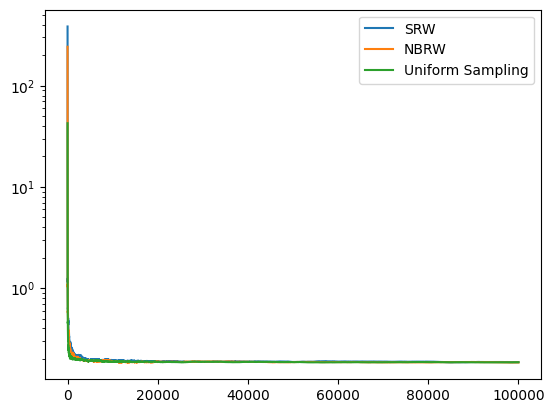

In [ ]:
plt.plot(np.arange(0, num_iter), (exp_loss_srw), label = 'SRW')
plt.plot(np.arange(0, num_iter), (exp_loss_nbrw), label = 'NBRW')
plt.plot(np.arange(0, num_iter), (exp_loss_us), label = 'Uniform Sampling')
plt.yscale('log')
plt.legend()

#### Single shuffling

In [ ]:
losses_ss = []

num_expts = 50

for expt in range(num_expts):

  print("Running experiment:", expt+1)

  node_perm = np.random.permutation(np.arange(0, n))

  theta = np.random.rand(k, 1)

  num_iter = int(1e5)

  ep_loss = []

  for i in range(1, num_iter + 1):

    current_node = node_perm[(i-1)%n]

    a_i = A[:, current_node].reshape(k, 1)

    gamma = 1/(i**(0.9))

    grad_g = 2*( theta - a_i )

    theta -= gamma * grad_g

    ep_loss.append(np.linalg.norm(theta - theta_optim)**2)

  losses_ss.append(ep_loss)

Running experiment: 1
Running experiment: 2
Running experiment: 3
Running experiment: 4
Running experiment: 5
Running experiment: 6
Running experiment: 7
Running experiment: 8
Running experiment: 9
Running experiment: 10
Running experiment: 11
Running experiment: 12
Running experiment: 13
Running experiment: 14
Running experiment: 15
Running experiment: 16
Running experiment: 17
Running experiment: 18
Running experiment: 19
Running experiment: 20
Running experiment: 21
Running experiment: 22
Running experiment: 23
Running experiment: 24
Running experiment: 25
Running experiment: 26
Running experiment: 27
Running experiment: 28
Running experiment: 29
Running experiment: 30
Running experiment: 31
Running experiment: 32
Running experiment: 33
Running experiment: 34
Running experiment: 35
Running experiment: 36
Running experiment: 37
Running experiment: 38
Running experiment: 39
Running experiment: 40
Running experiment: 41
Running experiment: 42
Running experiment: 43
Running experiment: 

In [ ]:
exp_loss_ss = np.mean(np.array(losses_ss), axis = 0)

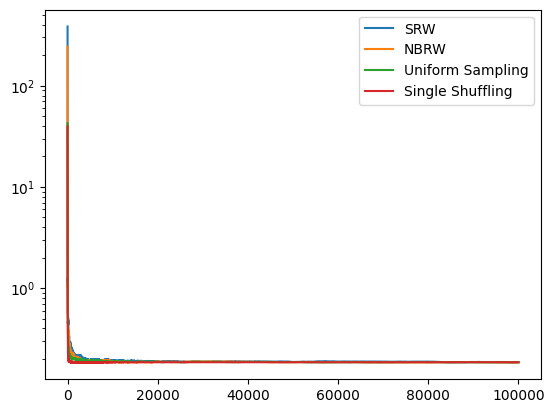

In [ ]:
plt.plot(np.arange(0, num_iter), (exp_loss_srw), label = 'SRW')
plt.plot(np.arange(0, num_iter), (exp_loss_nbrw), label = 'NBRW')
plt.plot(np.arange(0, num_iter), (exp_loss_us), label = 'Uniform Sampling')
plt.plot(np.arange(0, num_iter), (exp_loss_ss), label = 'Single Shuffling')
plt.yscale('log')
plt.legend()

#### Random shuffling

In [ ]:
losses_rs = []

num_expts = 50

for expt in range(num_expts):

  print("Running experiment:", expt+1)

  theta = np.random.rand(k, 1)

  num_iter = int(1e5)

  ep_loss = []

  for i in range(1, num_iter + 1):

    if (i-1)%n == 0:
      node_perm = np.random.permutation(np.arange(0, n))

    current_node = node_perm[(i-1)%n]

    a_i = A[:, current_node].reshape(k, 1)

    gamma = 1/(i**(0.9))

    grad_g = 2*( theta - a_i )

    theta -= gamma * grad_g

    ep_loss.append(np.linalg.norm(theta - theta_optim)**2)

  losses_rs.append(ep_loss)

Running experiment: 1
Running experiment: 2
Running experiment: 3
Running experiment: 4
Running experiment: 5
Running experiment: 6
Running experiment: 7
Running experiment: 8
Running experiment: 9
Running experiment: 10
Running experiment: 11
Running experiment: 12
Running experiment: 13
Running experiment: 14
Running experiment: 15
Running experiment: 16
Running experiment: 17
Running experiment: 18
Running experiment: 19
Running experiment: 20
Running experiment: 21
Running experiment: 22
Running experiment: 23
Running experiment: 24
Running experiment: 25
Running experiment: 26
Running experiment: 27
Running experiment: 28
Running experiment: 29
Running experiment: 30
Running experiment: 31
Running experiment: 32
Running experiment: 33
Running experiment: 34
Running experiment: 35
Running experiment: 36
Running experiment: 37
Running experiment: 38
Running experiment: 39
Running experiment: 40
Running experiment: 41
Running experiment: 42
Running experiment: 43
Running experiment: 

In [ ]:
exp_loss_rs = np.mean(np.array(losses_rs), axis = 0)

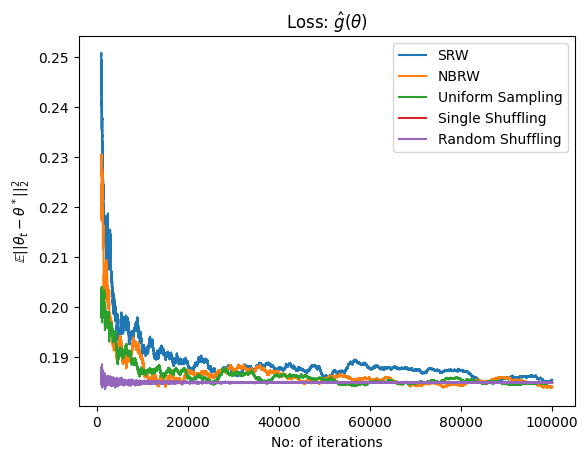

In [ ]:
plt.plot(np.arange(1001, num_iter+1), (exp_loss_srw[1000:]), label = 'SRW')
plt.plot(np.arange(1001, num_iter+1), (exp_loss_nbrw[1000:]), label = 'NBRW')
plt.plot(np.arange(1001, num_iter+1), (exp_loss_us[1000:]), label = 'Uniform Sampling')
plt.plot(np.arange(1001, num_iter+1), (exp_loss_ss[1000:]), label = 'Single Shuffling')
plt.plot(np.arange(1001, num_iter+1), (exp_loss_rs[1000:]), label = 'Random Shuffling')
#plt.yscale('log')
plt.title(r"Loss: $\hat{g}(\theta)$")
plt.ylabel(r"$\mathbb{E}||\theta_t - \theta^*||^2_2$")
plt.xlabel("No: of iterations")
plt.legend()
plt.savefig("drive/MyDrive/EE5111/square_loss.eps", format='eps', bbox_inches = 'tight')

In [ ]:
gammas = [1/(x**(0.9)) for x in range(1, num_iter+1)]

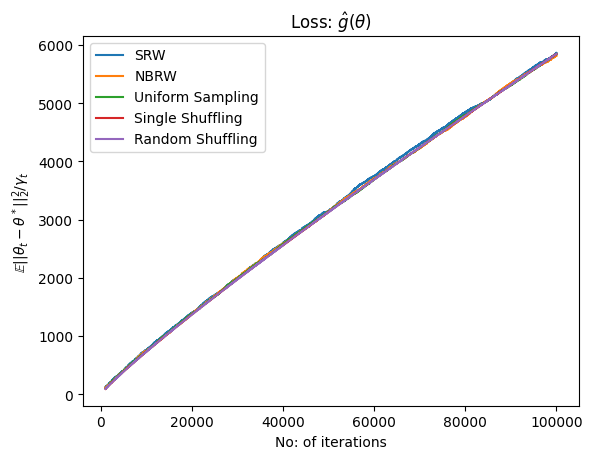

In [ ]:
plt.plot(np.arange(1001, num_iter+1), (exp_loss_srw[1000:]/gammas[1000:]), label = 'SRW')
plt.plot(np.arange(1001, num_iter+1), (exp_loss_nbrw[1000:]/gammas[1000:]), label = 'NBRW')
plt.plot(np.arange(1001, num_iter+1), (exp_loss_us[1000:]/gammas[1000:]), label = 'Uniform Sampling')
plt.plot(np.arange(1001, num_iter+1), (exp_loss_ss[1000:]/gammas[1000:]), label = 'Single Shuffling')
plt.plot(np.arange(1001, num_iter+1), (exp_loss_rs[1000:]/gammas[1000:]), label = 'Random Shuffling')
plt.title(r"Loss: $\hat{g}(\theta)$")
plt.ylabel(r"$\mathbb{E}||\theta_t - \theta^*||^2_2 / \gamma_t$")
plt.xlabel("No: of iterations")
plt.legend()
plt.savefig("drive/MyDrive/EE5111/square_loss_gamma.eps", format='eps', bbox_inches = 'tight')